In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

data = pd.read_csv('titanic_train.csv')

In [2]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#年齢はばらつきが大きいので、素直に捨てる。
#Cabinは使わない。
data_2 = data.dropna(subset = ['Age'])

In [5]:
#ダミー変数
sex_mapping = {'male': 0, 'female': 1}
data_2['Sex'] = data_2['Sex'].map(sex_mapping)
data_2

/Users/poey1996/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S


In [6]:
#死者、生存者に分ける。
final_data = data_2.sort_values(by = ['Survived'], ascending = True)
final_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
544,545,0,1,"Douglas, Mr. Walter Donald",0,50.0,1,0,PC 17761,106.4250,C86,C
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",1,11.0,4,2,347082,31.2750,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",1,9.0,4,2,347082,31.2750,NaN,S
536,537,0,1,"Butt, Major. Archibald Willingham",0,45.0,0,0,113050,26.5500,B38,S
534,535,0,3,"Cacic, Miss. Marija",1,30.0,0,0,315084,8.6625,NaN,S
532,533,0,3,"Elias, Mr. Joseph Jr",0,17.0,1,1,2690,7.2292,NaN,C
529,530,0,2,"Hocking, Mr. Richard George",0,23.0,2,1,29104,11.5000,NaN,S
528,529,0,3,"Salonen, Mr. Johan Werner",0,39.0,0,0,3101296,7.9250,NaN,S
525,526,0,3,"Farrell, Mr. James",0,40.5,0,0,367232,7.7500,NaN,Q


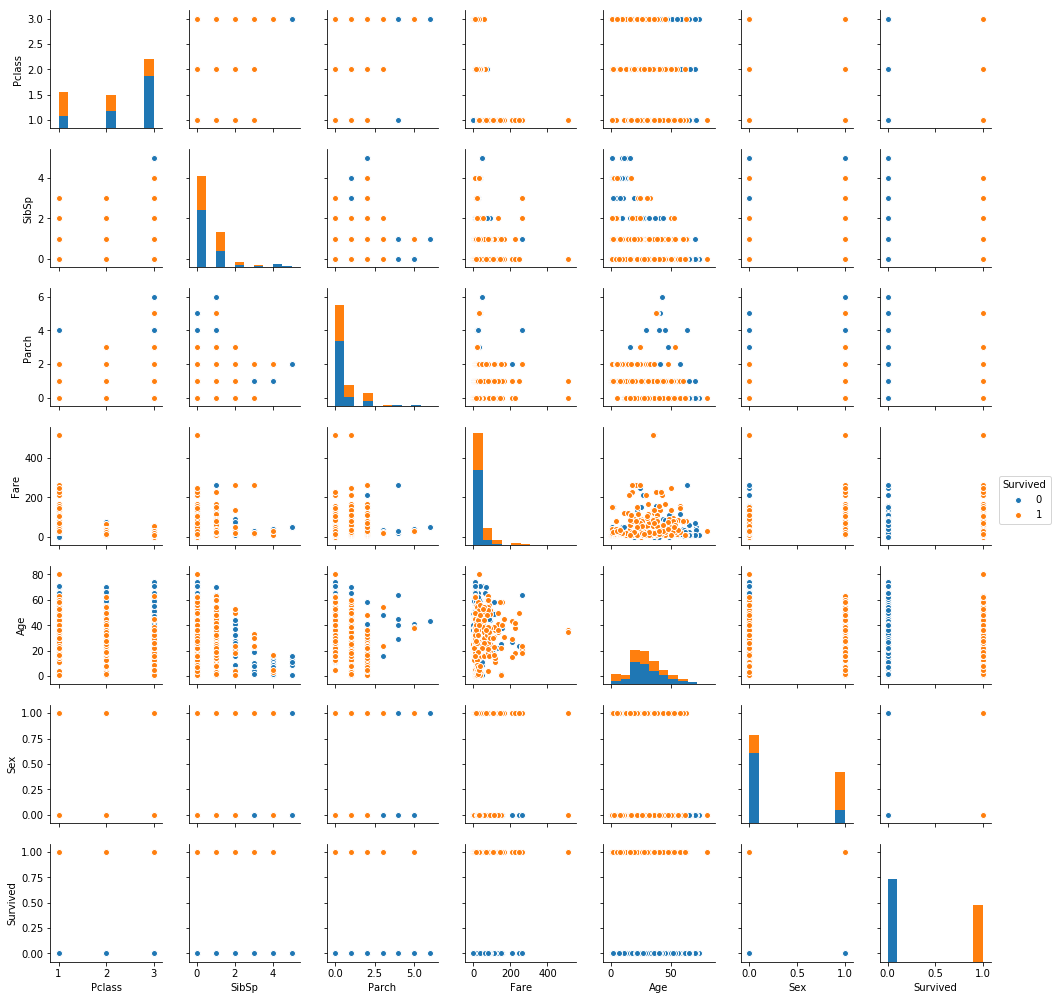

In [7]:
#相関を調べる
df_1 = pd.DataFrame(final_data, columns = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'Sex', 'Survived'])
import seaborn as sns
sns.pairplot(df_1, hue = 'Survived', size = 2.0)
plt.show()

In [8]:
df_1.corr()

,Pclass,SibSp,Parch,Fare,Age,Sex,Survived
Pclass,1.000000,0.067247,0.025683,-0.554182,-0.369226,-0.155460,-0.359653
SibSp,0.067247,1.000000,0.383820,0.138329,-0.308247,0.103950,-0.017358
Parch,0.025683,0.383820,1.000000,0.205119,-0.189119,0.246972,0.093317
Fare,-0.554182,0.138329,0.205119,1.000000,0.096067,0.184994,0.268189
Age,-0.369226,-0.308247,-0.189119,0.096067,1.000000,-0.093254,-0.077221
Sex,-0.155460,0.103950,0.246972,0.184994,-0.093254,1.000000,0.538826
Survived,-0.359653,-0.017358,0.093317,0.268189,-0.077221,0.538826,1.000000


In [9]:
#まとめ
#金持ちの方が生存率がいい。(Pclass, Fare)
#男より女、大人より子供と老人が生存率が高い。
#Parch SibSp Fare がよく似ている。主成分分析で情報のロスが少なくしたまま、次元を減らすことができる（はず）。


In [10]:
#目的関数
y = pd.DataFrame(final_data, columns = ['Survived']).values
y = np.reshape(y, (-1))

In [11]:
#主成分分析
X_1 = pd.DataFrame(final_data, columns = [ 'SibSp', 'Parch', 'Fare']).values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_1)
X_std_1 = scaler.fit_transform(X_1)
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca_1 = pca.fit_transform(X_std_1)

In [12]:
#チェック
X_pca_1[:10]

array([[-0.23201392],
       [ 0.58792436],
       [ 3.49583124],
       [ 3.49583124],
       [-0.7389284 ],
       [-0.88681493],
       [ 0.5327038 ],
       [ 1.234492  ],
       [-0.89291228],
       [-0.8943591 ]])

In [13]:
print(pca.explained_variance_ratio_)

[ 0.50063932]


In [14]:
#説明変数の準備
X_2 = pd.DataFrame(final_data, columns = ['Pclass', 'Sex', 'Age']).values
X_pca_1.shape
X_3 = np.c_[X_pca_1, X_2]

In [15]:
#ホールドアウト法
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_3, y, test_size=0.3, random_state=0)

In [16]:
#ランダム木
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators=50, max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
#ここで一度スコアを確認
print('train accuracy: %.3f' % rfc.score(X_train, y_train))
print('test  accuracy: %.3f' % rfc.score(X_test, y_test))

train accuracy: 0.842
test  accuracy: 0.814


In [18]:
#グリッドサーチでn_estimators, max_depthを調整

In [19]:
param_grid = {'n_estimators': [30, 40, 50, 60, 70, 80],
              'max_depth': [3, 4, 5, 6]}

In [20]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [21]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(RandomForestClassifier(), param_grid, cv=kf)

In [22]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 40, 50, 60, 70, 80], 'max_depth': [3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [23]:
#最適化された組み合わせ
gs.best_params_

{'max_depth': 6, 'n_estimators': 60}

In [24]:
#その時のスコア
gs.best_score_

0.83366733466933862

In [25]:
#テストでのスコア
gs.score(X_test, y_test)

0.81860465116279069